In [9]:
import numpy as np 
from keras.datasets import mnist
from keras.models import Model 
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [10]:
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()
 
# 数据预处理
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
 
# 压缩特征维度至2维
encoding_dim = 2
 
# this is our input placeholder
input_img = Input(shape=(784,))
 
# 编码层
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)
 
# 解码层
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

In [ ]:
# 构建自编码模型
autoencoder = Model(inputs=input_img, outputs=decoded)
 
# 构建编码模型
encoder = Model(inputs=input_img, outputs=encoder_output)

In [11]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_6 (Dense)              (None, 64)                704       
__________

In [4]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 109,408
Trainable params: 109,408
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# training
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True)

In [5]:
 
# plotting
encoded_imgs = encoder.predict(x_test)

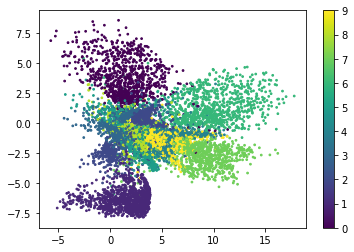

In [6]:
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, s=3)
plt.colorbar()
plt.show()

In [8]:

x_test

array([[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       ...,
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]], dtype=float32)